In [1]:
from sko.GA import GA
import numpy as np
 
def adapt(x):
    return 2 * pow(x, 2)
 
# func 适应度函数
# n_dim 自变量的个数
# size_pop 种群初始化个体数量
# max_iter 进化迭代次数
# prob_mut 变异概率
# lb 自变量下限
# ub 自变量上限
# precision 精度
def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)


ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [-2.98023233e-08  8.94069698e-08] 
 best_y: [0.]


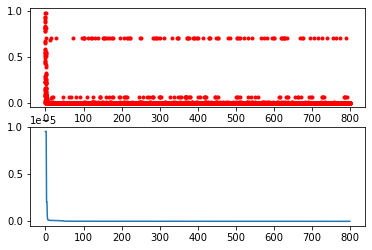

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [47]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
points_coordinate

array([[0.01384671, 0.10998692],
       [0.83014274, 0.50676913],
       [0.23659508, 0.46176947],
       [0.01796187, 0.08672264],
       [0.65892727, 0.53220714],
       [0.92522885, 0.97327284],
       [0.64209835, 0.26602539],
       [0.48610954, 0.80597232],
       [0.00787774, 0.81937435],
       [0.77516863, 0.12649881],
       [0.50099371, 0.89739691],
       [0.91215198, 0.37980395],
       [0.90784633, 0.7374459 ],
       [0.17604844, 0.78541272],
       [0.30284359, 0.49693178],
       [0.79236818, 0.37393725],
       [0.62449554, 0.99651976],
       [0.16709832, 0.63103058],
       [0.77425006, 0.55587877],
       [0.31931688, 0.52484532],
       [0.64691307, 0.77166075],
       [0.81034964, 0.59465027],
       [0.36432779, 0.94913883],
       [0.41905303, 0.45292668],
       [0.26520772, 0.40948915],
       [0.68408517, 0.11458894],
       [0.34935224, 0.09705001],
       [0.52839507, 0.65680574],
       [0.77705933, 0.42589291],
       [0.69485156, 0.13810038],
       [0.

In [48]:
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
distance_matrix

array([[0.        , 0.9076207 , 0.41637459, ..., 0.79193984, 1.21186966,
        0.47408258],
       [0.9076207 , 0.        , 0.59525103, ..., 0.2141246 , 0.38609709,
        0.4338349 ],
       [0.41637459, 0.59525103, 0.        , ..., 0.57063261, 0.82837408,
        0.25987281],
       ...,
       [0.79193984, 0.2141246 , 0.57063261, ..., 0.        , 0.59935453,
        0.33812801],
       [1.21186966, 0.38609709, 0.82837408, ..., 0.59935453, 0.        ,
        0.76191011],
       [0.47408258, 0.4338349 , 0.25987281, ..., 0.33812801, 0.76191011,
        0.        ]])

In [49]:
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


In [50]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

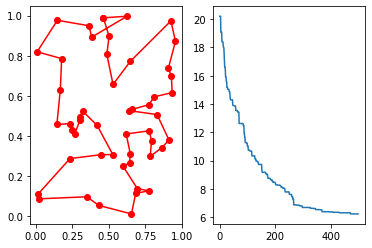

In [51]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sko.GA import GA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
 
#首先学习一下官方文档
 
'''
min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
s.t.
    x1*x2 >= 1
    x1*x2 <= 5
    x2 + x3 = 1
    0 <= x1, x2, x3 <= 5
'''
def obj_func(p):
    print(p)
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2
 

## 约束表达必须小雨等于0
def constraint_eq_func(x):
    eq = 1-x[1]-x[2]
    print(f"eq:{eq}")
    return eq
constraint_eq = [
    #等式约束条件：表达式要小于等于0
    # lambda x: 1 - x[1] - x[2] 
    # constraint_eq_func
    ## 自定定义的约束，x【2】必须小于0.1
    lambda x:0.1 - x[2]
    
]
 
constraint_ueq = [
    #不等式约束条件：
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
    #无需使用不等式表示，直接使用表达式即可，但该表达式需要小于等于0，列如第一个约束条件5>=x1*x2,则改写成x1*x2-5：
]
 
 
 
ga = GA(func=obj_func,n_dim=3,size_pop=50,max_iter=100,lb=[0,0,0],ub=[5,5,5]
        ,constraint_eq = constraint_eq
        ,constraint_ueq=constraint_ueq
        ,precision=[1,0.1,0.01])
#func：需要优化的目标，n_dim:优化参数个数，lb、ub参数的上下界,constraint_eq、constraint_ueq：约束条件，
# precision：可以使用整数或浮点数，若使用整数例如1则自变量会启用整数规划模式，浮点数同理，但是优化结果得到的整数是带有小数点的（1.0000），在有些情况下比如random_state他的值必须是个整数，此时需要将结果转成整型
best_x,best_y = ga.run()
print('best_x:', best_x,'\n','best_y:',best_y)
 
 

 

[5.         4.52380952 0.22504892]
[5.         0.15873016 3.23874755]
[0.         2.46031746 1.49706458]
[4.         0.63492063 0.68493151]
[0.         1.11111111 4.08023483]
[2.         0.55555556 3.75733855]
[0.         2.46031746 0.00978474]
[5.         1.19047619 1.7221135 ]
[1.         4.36507937 0.14677104]
[2.         4.36507937 3.73776908]
[5.         4.04761905 0.14677104]
[3.         2.85714286 1.65362035]
[5.         3.80952381 1.97651663]
[5.         1.03174603 3.24853229]
[5.         3.49206349 1.01761252]
[1.         0.63492063 1.66340509]
[0.         3.73015873 2.41682975]
[2.         0.15873016 0.61643836]
[5.         3.65079365 3.24853229]
[3.         1.82539683 2.41682975]
[4.         3.25396825 2.61252446]
[4.         0.47619048 1.2035225 ]
[1.         1.58730159 1.49706458]
[4.         1.19047619 3.87475538]
[5.         3.80952381 4.6183953 ]
[3.         4.6031746  3.36594912]
[2.         1.42857143 0.10763209]
[5.         1.26984127 0.86105675]
[3.         0.396825

In [53]:
#网上大部分例子都是和官方给出的差不多，我尝试使用该包来优化skearn中的逻辑回归模型，该例子比较简单
# 逻辑回归参数解释 https://www.jianshu.com/p/5e92abd6a3f0 
 
iris = load_iris()
xtrain,xtest,ytrain,ytest = train_test_split(iris['data'],iris['target'],test_size=0.2)
def func(p):
    w1, w2 = p
    clf = LogisticRegression(max_iter=int(w1) # 最大迭代次数
                             , random_state=int(w2) 
                             )
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest,ytest)
    # print(f"scroe:{-score}")
    return -score #由于这里的GA默认求得最小值，而我们想要score达到最大值，因此需要在score前加负号
 
ga = GA(func=func, n_dim=2, size_pop=50, max_iter=10, lb=[0, 0],ub=[100, 42],precision=[1,1])
best_x,best_y = ga.run()
print('best_x:', best_x,'\n','best_y:',best_y)

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

best_x: [100.   9.] 
 best_y: [-1.]


/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [54]:
best_x[0]

100.0

In [55]:
clf = LogisticRegression(max_iter=int(best_x[0]) # 最大迭代次数
                             , random_state=int(best_x[-1])
                             ,penalty="l1"
                             ,solver="liblinear"
                             )
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

1.0

In [56]:
predicty=clf.predict(X=xtest) 
ytest - predicty

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])